<a href="https://colab.research.google.com/github/AlexSalazar314/Escuela-de-Invierno-2026/blob/main/Redes_Neuronales_para_predicci%C3%B3n_de_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de series de tiempo mediante redes neuronales
Jesús Alejandro Salazar González

Hola

In [ ]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU
from sklearn.model_selection import train_test_split
from collections import defaultdict
import plotly.graph_objects as go

In [ ]:
# Conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Situarse en la carpeta donde esten los datos guardados

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Escuela de invierno

/content/drive/MyDrive/Colab Notebooks/Escuela de invierno


# Predicción de series de tiempo

**Serie de tiempo** : Conjunto de mediciones de la evolución de una variable a lo largo del tiempo.

La predicción de series de tiempo es utilizada para la toma de decisiones, las aplicaciones son variadas y
pueden ir desde la identificación temprana de una afección cardiaca, el pronóstico del clima e inclusive para
detectar anomalías de maquinaria industrial

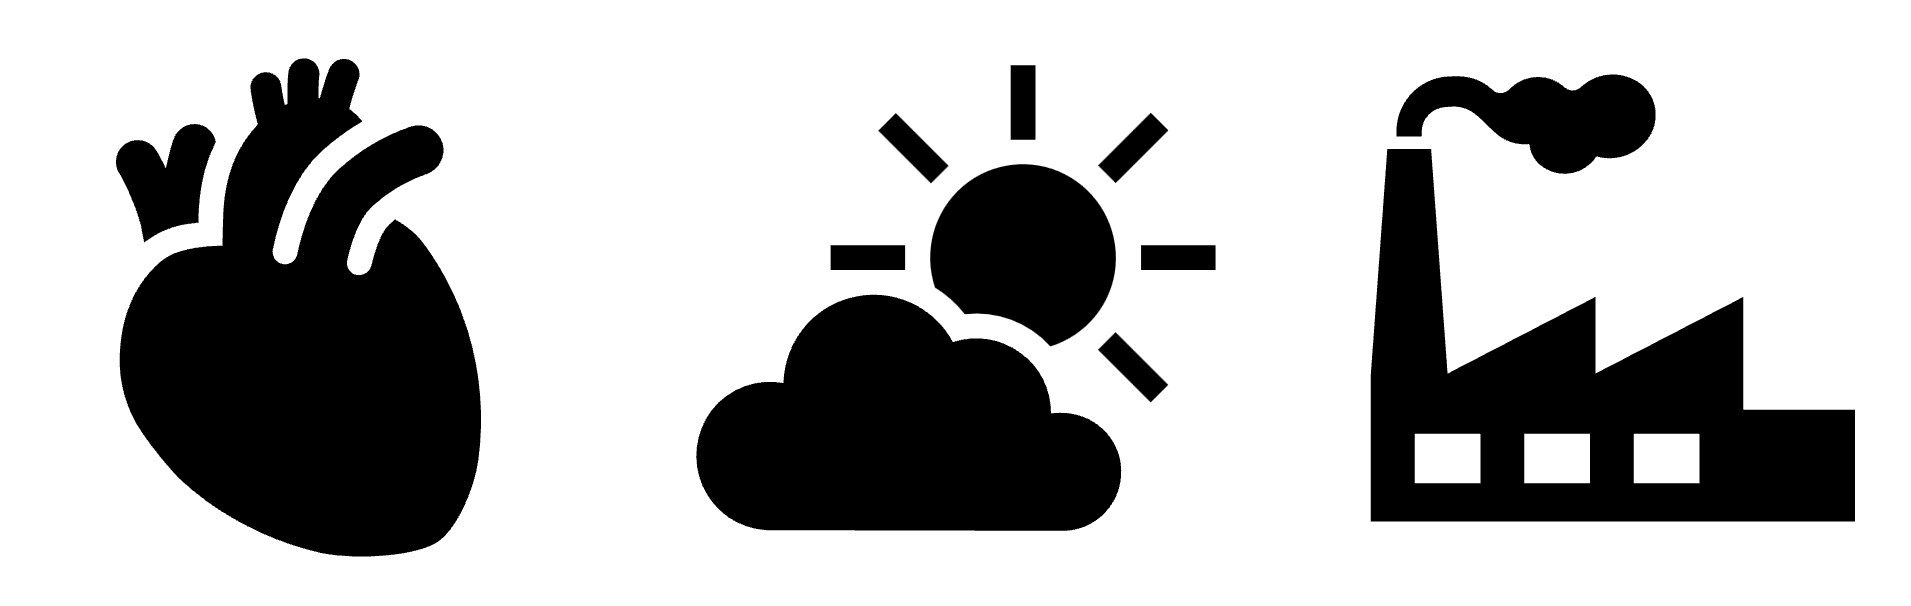

Muchas de estas aplicaciones pueden modelarse como sistemas dinámicos, es decir, sistemas cuyo estado evoluciona en el tiempo de acuerdo con ciertas reglas.

 La manera tradicional de trabajar modelos en los sistemas
dinámicos involucra un estudio del comportamiento físico del problema para llegar al planteamiento de
ecuaciones diferenciales que permitan describir el problema

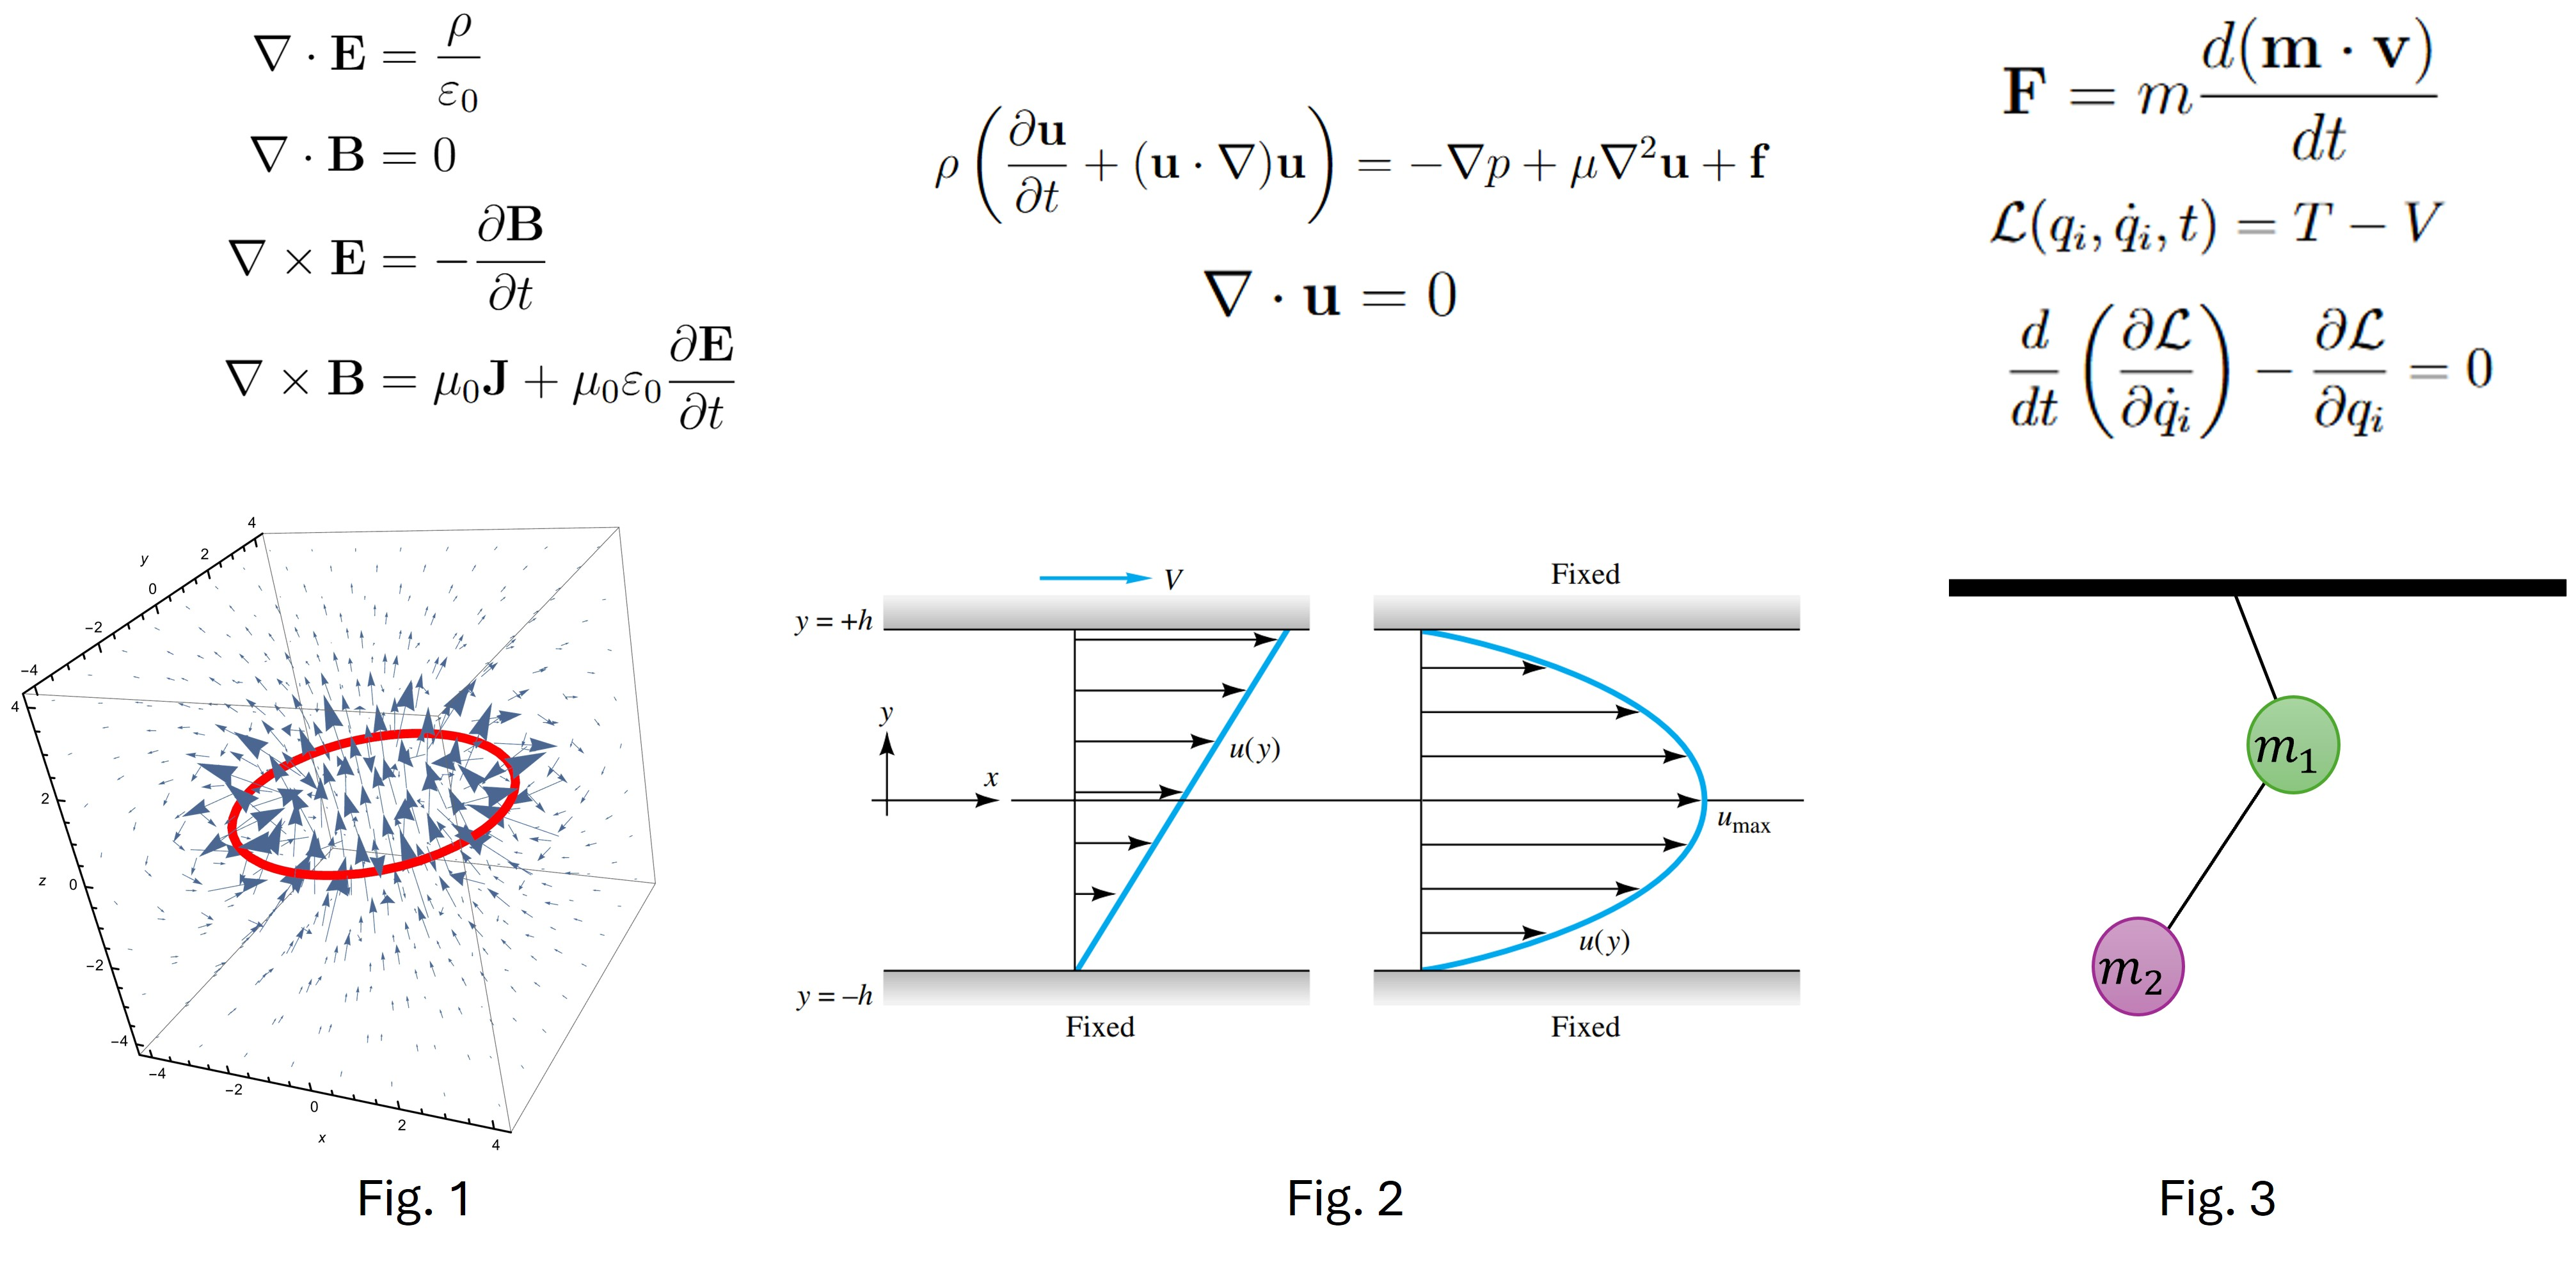

Figura 2 extraida de [1].

Hay algunos sistemas que son muy dificiles de realizar predicciones. Por ejemplo los sistemas caóticos debido a que son muy sensibles a las condiciones iniciales.

Un ejemplo de ellos es el sistema de Lorenz

Ecuaciones de Lorenz
$$ \frac{dx}{dt}=\sigma (-x+y)$$

$$ \frac{dy}{dt}=rx-y-xz$$

$$ \frac{dz}{dt}=-bz+xy$$

In [ ]:
# Definimos el sistema de ecuaciones
def Lorenz(x, y, z, sigma, r,b):
  f=sigma*(-x+y)
  g=r*x-y-x*z
  h=-b*z+x*y
  return np.array([f,g,h])  # Retorna las derivdas para usar en rungekutta

def RungeKuttaOrden4Lorenz(t0, tf,n,x0,y0,z0,sigma, r,b):
  # Nececitamos
  # t0 tiempo inicial
  # tf tiempo final, n cantidad de muestras
  # x0,y0,z0 condiciones iniciales
  # sigma, r y b, constantes
  hpaso=(tf-t0)/n
  tiempo=np.linspace(t0,tf,n)
  posicion=np.zeros((n, 3))
  posicion[0]=[x0,y0,z0]
  j=0
  for i in posicion:
        x, y, z = i
        k1 = hpaso * Lorenz(x, y, z, sigma, r, b)
        k2 = hpaso * Lorenz(x + k1[0] / 2, y + k1[1] / 2, z + k1[2] / 2, sigma, r, b)
        k3 = hpaso * Lorenz(x + k2[0] / 2, y + k2[1] / 2, z + k2[2] / 2, sigma, r, b)
        k4 = hpaso * Lorenz(x + k3[0], y + k3[1], z + k3[2], sigma, r, b)

        posicion[j + 1] = posicion[j] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        j=j+1
        if j==n-1:
          break


  return tiempo,posicion



In [ ]:
# Sistema original
t0, tf, n = 0, 50, 10000
x0, y0, z0 = 1,0,0
sigma, r, b = 10, 28, 8/3

t,posicion = RungeKuttaOrden4Lorenz(t0, tf, n, x0, y0, z0, sigma, r, b)
x=posicion[:,0]
y=posicion[:,1]
z=posicion[:,2]

# Sistema desfasado
t0, tf, n = 0, 50, 10000
x0, y0, z0 = 1,0+1E-3,0 # Agregar pequeño desfase
sigma, r, b = 10, 28, 8/3

t1,posicion = RungeKuttaOrden4Lorenz(t0, tf, n, x0, y0, z0, sigma, r, b)
x1=posicion[:,0]
y1=posicion[:,1]
z1=posicion[:,2]

Visualizando desfases

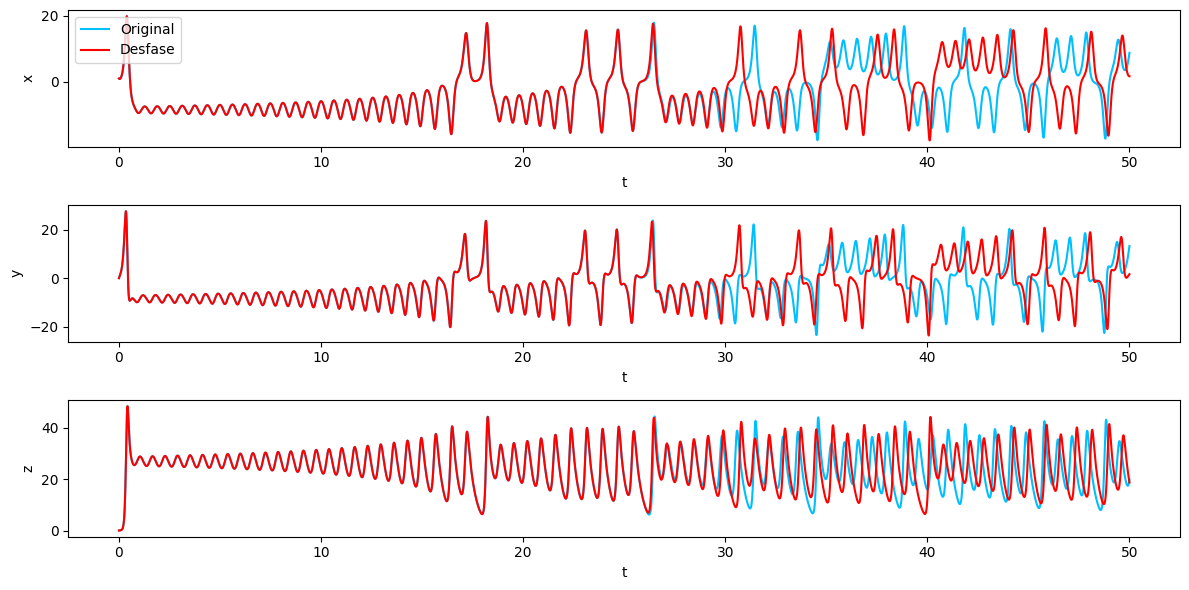

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t,x,color="DeepSkyblue",label="Original")
plt.plot(t1,x1,color="red",label="Desfase")
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.subplot(3, 1, 2)
plt.plot(t,y,color="deepskyblue")
plt.plot(t1,y1,color="red")
plt.xlabel("t")
plt.ylabel("y")
plt.subplot(3, 1, 3)
plt.plot(t,z,color="deepskyblue")
plt.plot(t1,z1,color="red")
plt.xlabel("t")
plt.ylabel("z")
plt.tight_layout()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(width=1, color='DeepSkyBlue'),


))
fig.add_trace(go.Scatter3d(
    x=x1, y=y1, z=z1,
    mode='lines',
    line=dict(width=1, color='red')
))


# ¿Cómo realizar predicciones de series de tiempo usando redes neuronales?

## Ventanas deslizantes en series de tiempo

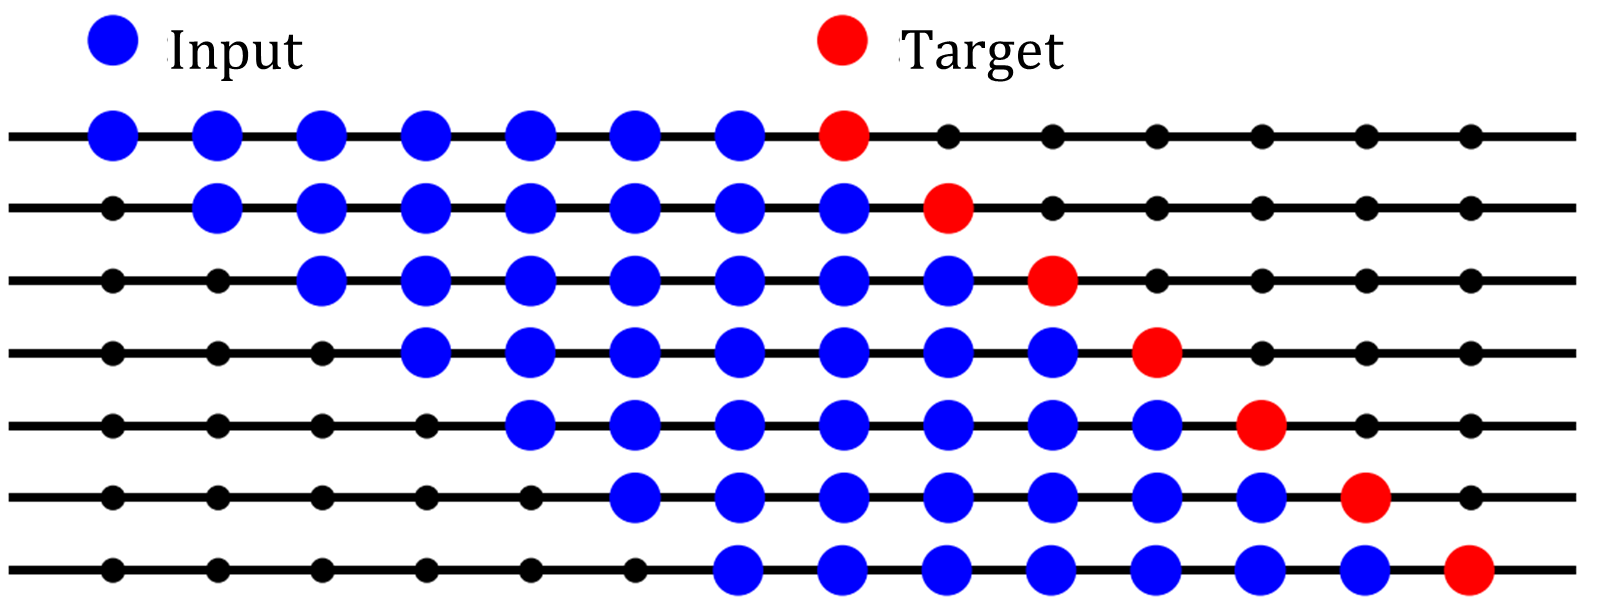

Figura modificada de [2]

## Tipos de predicciones

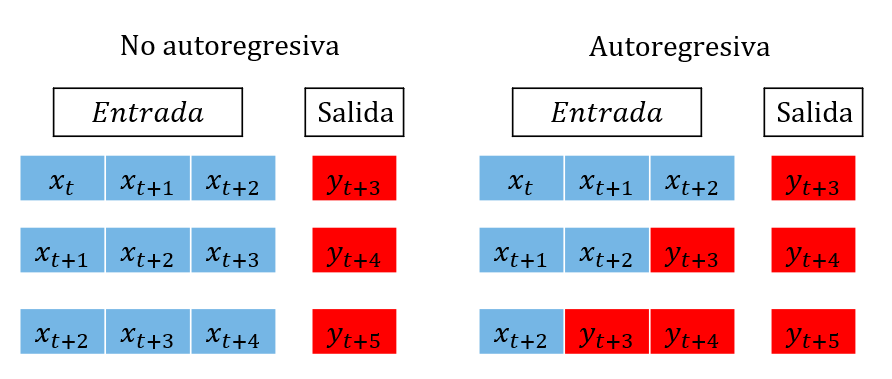

## Redes neuronales

En el caso de datos secuenciales las redes neuronales recurrentes (RNNs) son ampliamente utilizadas debido a que utilizan información del pasado inmediato para predecir el siguiente paso.

##Redes LSTM (long short-term memory)

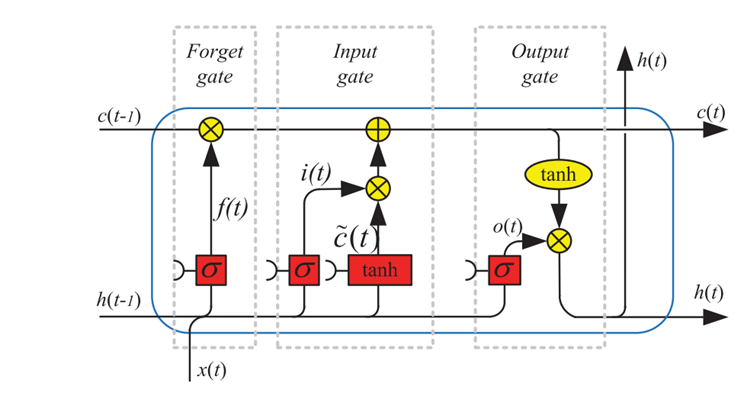

Figura extraída de [3].

Contiene 4 partes importantes:


1.   Compuerta de olvido:¿Qué información del pasado debo conservar?
2.   Compuerta de entrada: ¿Qué información nueva debo guardar?
3.   Estado de memoria
4. Compuerta de salida: La predicción

# Ejemplo

# Base de datos

Se utiliza una versión reducida de la base de datos empleada en [4], el cual consiste en
trayectorias de sistemas dinámicos caóticos obtenidos mediante algoritmos evolutivos.

Algunas funciones que nos serán de utilidad

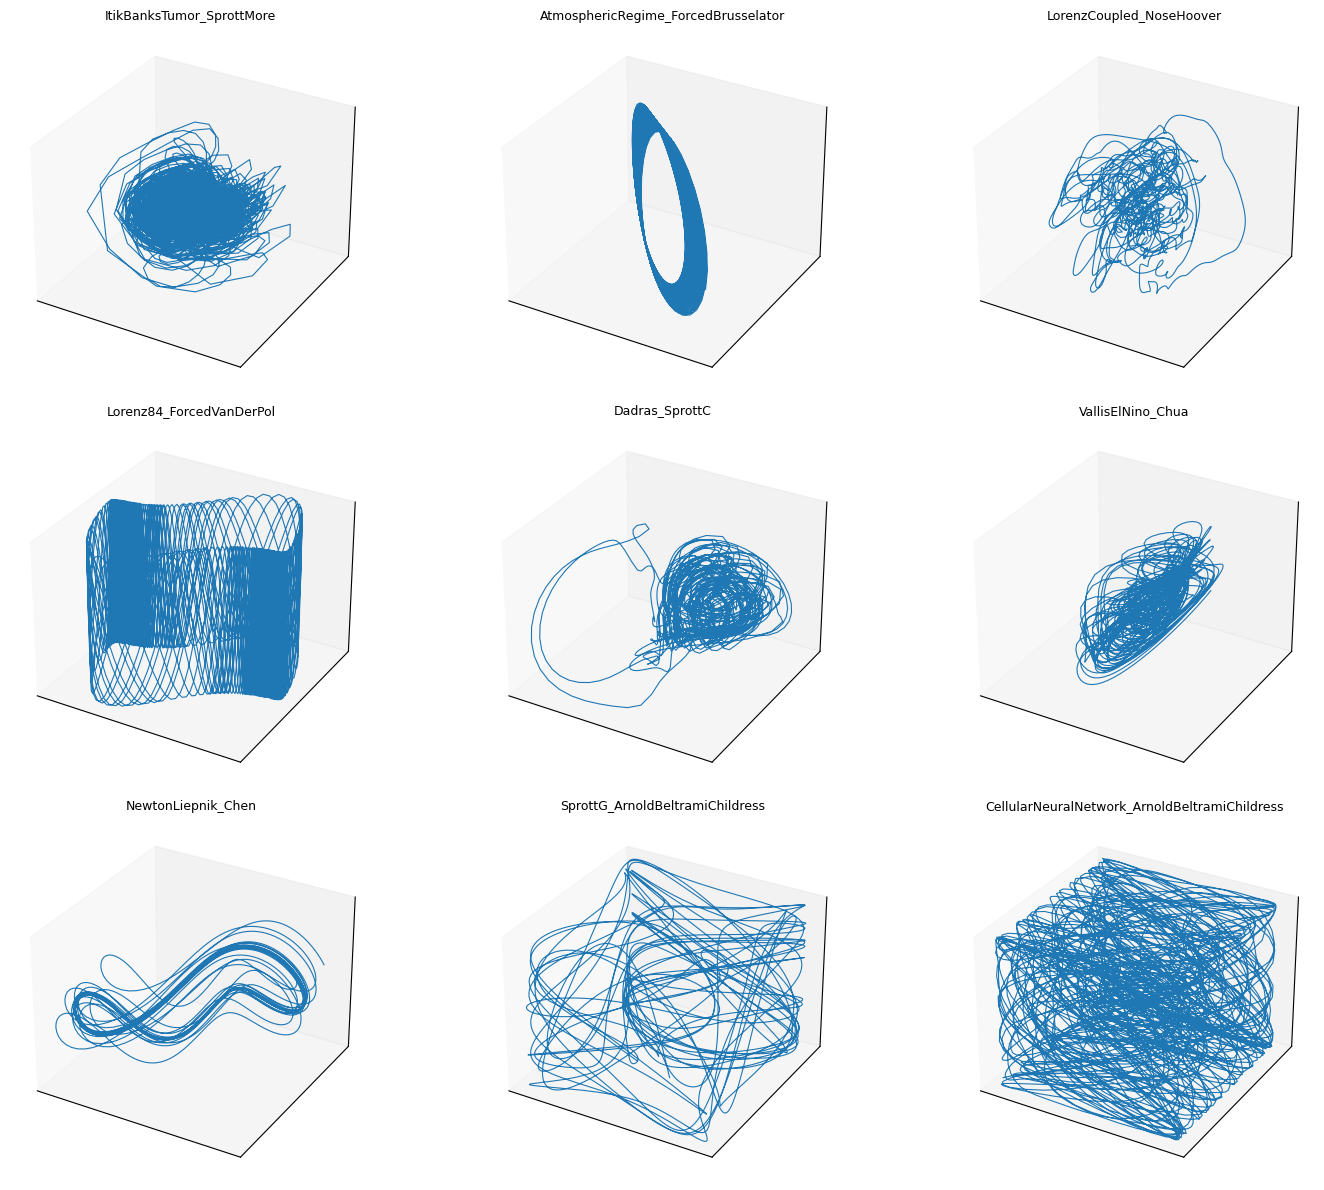

In [ ]:
# Cargando datos
data = np.load("timeseries_100_systems.npz", allow_pickle=True)
scaled = data["scaled"] # se estandarizaron previamente
systems = data["system"]  # Nombres de los sitemas

# 9 series aleatorias

indices_sel = random.sample(range(len(scaled)), 9)

#Graficar
fig = plt.figure(figsize=(15, 12))

for i, idx in enumerate(indices_sel):
    arr = scaled[idx]  # (3, T)

    x, y, z = arr


    ax = fig.add_subplot(3, 3, i + 1, projection="3d")
    ax.plot(x, y, z, lw=0.8, color="blue")


    ax.set_title(str(systems[idx]), fontsize=9)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
seq_len = 100
pred_len = 10

def create_sequences(arr, seq_len=100, pred_len=10):
    X, y = [], []
    T = arr.shape[1]
    for i in range(T - seq_len - pred_len):
        X.append(arr[:, i:i+seq_len].T)             # (seq_len, 3)
        y.append(arr[:, i+seq_len:i+seq_len+pred_len].T)  # (pred_len, 3)
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

X_data, y_data, system_labels = [], [], []

for i, series in enumerate(scaled):
    X, y = create_sequences(series, seq_len, pred_len)

    X_data.append(X)
    y_data.append(y)

    system_labels.extend([systems[i]] * len(X))

X_all = np.concatenate(X_data)
y_all = np.concatenate(y_data)
system_labels = np.array(system_labels)

print(f"X_all: {X_all.shape}, y_all: {y_all.shape}, etiquetas: {system_labels.shape}")


X_all: (398600, 100, 3), y_all: (398600, 10, 3), etiquetas: (398600,)


In [ ]:

# Train/Test
X_train, X_test, y_train, y_test, systems_train, systems_test = train_test_split(
    X_all, y_all, system_labels, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (318880, 100, 3), Test: (79720, 100, 3)


In [ ]:


def sliding_prediction(
    model,
    true_series,
    seq_len,
    pred_len,
    max_len,
    autoregressive=False
):

    ##Predicción deslizante

    #autoregressive = False -- solo datos reales



    n_features = true_series.shape[1]
    true_series = true_series[:max_len]

    # Ventana inicial
    X_window = true_series[:seq_len].reshape(1, seq_len, n_features)

    pred_dict = defaultdict(list)

    for t in range(seq_len, max_len - pred_len):

        # Predicción
        y_pred = model.predict(X_window, verbose=0)
        y_pred = y_pred.reshape(pred_len, n_features)

        # Guardar predicciones superpuestas
        for j in range(pred_len):
            idx_pred = t + j
            if idx_pred < max_len:
                pred_dict[idx_pred].append(y_pred[j])

        # Actualizar ventana
        if autoregressive:
            next_step = y_pred[0]
        else:
            next_step = true_series[t]

        X_window = np.concatenate(
            [X_window[:, 1:, :], next_step.reshape(1, 1, n_features)],
            axis=1
        )

    # Estadísticos
    t_pred = np.array(sorted(pred_dict.keys()))
    pred_mean = np.array([np.mean(pred_dict[t], axis=0) for t in t_pred])
    pred_std  = np.array([np.std(pred_dict[t], axis=0)  for t in t_pred])

    return t_pred, pred_mean, pred_std


In [ ]:


def plot_results(t_pred, mean_pred, std_pred,true_series,n_features,color='blue'):

  fig, axes = plt.subplots(n_features, 1, figsize=(9, 4), sharex=True)

  for f in range(n_features):

      # Real
      axes[f].plot(
          true_series[:, f],
          color='black',
          linewidth=1.5,
          label='Real'
      )

      # Prediccion
      axes[f].plot(
          t_pred,
          mean_pred[:, f],
          '--',
          color=color,
          label='Predicción'
      )

      axes[f].fill_between(
          t_pred,
          mean_pred[:, f] - std_pred[:, f],
          mean_pred[:, f] + std_pred[:, f],
          color=color,
          alpha=0.25,
          label='$\pm\sigma$' if f == 0 else None
      )


      axes[f].set_ylabel(f'Dimensión {f+1}')
      axes[f].grid(True, alpha=0.3)

  axes[-1].set_xlabel('Paso de tiempo')
  axes[0].legend(loc='upper left', ncol=2)



  plt.tight_layout()
  plt.show()


<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1087595133.py:30: SyntaxWarning: invalid escape sequence '\p'
  label='$\pm\sigma$' if f == 0 else None


In [ ]:
max_len = 600
n_features = 3

# Seleccion aleatoria para graficar
idx = np.random.randint(0, len(systems_test))
system_name = systems_test[idx]

system_idx = np.where(systems == system_name)[0][0]
true_series = scaled[system_idx].T
true_series = true_series[:max_len]



Entrenando un modelo

In [ ]:

# Modelo
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),

    Dense(y_train.shape[1] * y_train.shape[2])  # salida plana
])


y_train_flat = y_train.reshape((y_train.shape[0], -1))
y_test_flat = y_test.reshape((y_test.shape[0], -1))

model.compile(optimizer='adam', loss='mse')

# Entrenamiento
history = model.fit(
    X_train, y_train_flat,
    epochs=10,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.4947 - val_loss: 0.3177
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.3005 - val_loss: 0.2756
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2606 - val_loss: 0.2395
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.2312 - val_loss: 0.2160
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.2100 - val_loss: 0.1978
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.1927 - val_loss: 0.1854
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.1804 - val_loss: 0.1755
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.1694 - val_loss: 0.1693
Epoch 9/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.1648 - val_loss: 0.1644
Epoch 10/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.1597 - val_loss: 0.1583


Usando solamente datos reales:

In [ ]:
t_pred, mean_pred, std_pred = sliding_prediction(
    model,
    true_series,
    seq_len,
    pred_len,
    max_len,
    autoregressive=False
)

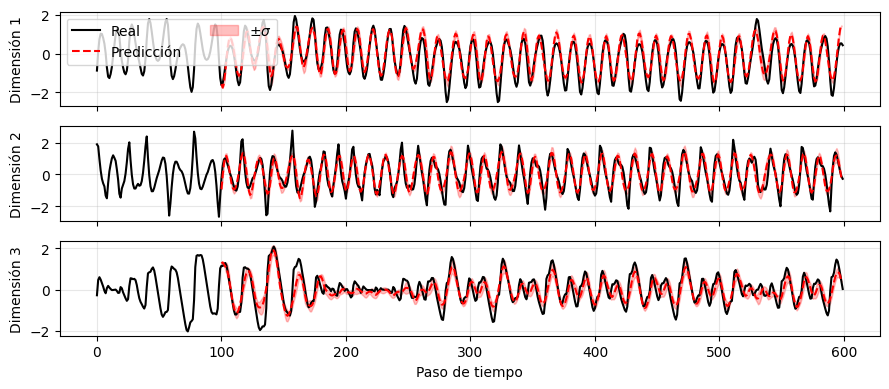

In [ ]:
plot_results(t_pred, mean_pred, std_pred,true_series,n_features,color='red')

Usando el método autoregresivo:

In [ ]:
t_pred, mean_pred, std_pred = sliding_prediction(
    model,
    true_series,
    seq_len,
    pred_len,
    max_len,
    autoregressive=True
)

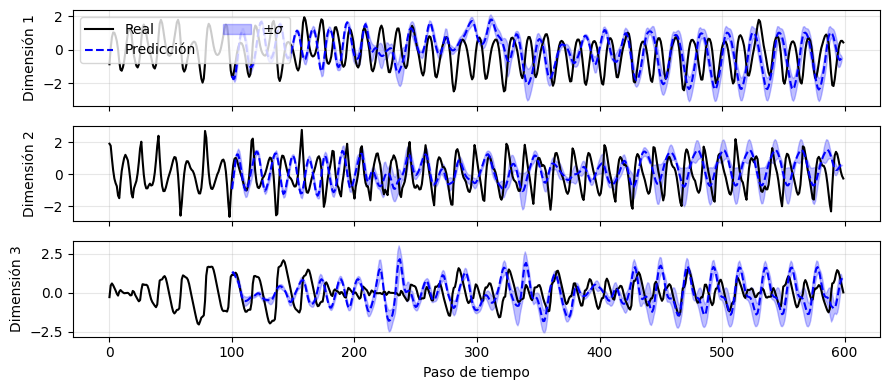

In [ ]:
plot_results(t_pred, mean_pred, std_pred,true_series,n_features)

# Referencias


[1] White, F. M. (2015). Fluid Mechanics (8.a ed.). McGraw-Hill
Education. (pp. 258)

[2] S. Park, S. Jung, S. Jung, S. Rho, and E. Hwang, “Sliding window-based LightGBM model for electric load forecasting using anomaly repair,” Journal of Supercomputing, vol. 77, no. 11, pp. 12857–12878, Nov. 2021, doi: 10.1007/S11227-021-03787-4.
  

[3] Y. Yu, X. Si, C. Hu, and J. Zhang, “A review of recurrent neural networks: Lstm cells and network architectures,” Neural Comput, vol. 31, no. 7, pp. 1235–1270, Jul. 2019, doi: 10.1162/NECO_A_01199.
  
[4] J. Lai, A. Bao, and W. Gilpin, “PANDA: A PRETRAINED FORECAST MODEL FOR CHAOTIC DYNAMICS”, Accessed: Nov. 18, 2025. [Online]. Available: https://github.com/abao1999/dystformer

